## Question	6 [Multiclass	Perceptron,	20 Marks]

### I. Load	Task1D_train.csv and	Task1D_test.csv sets.

In [1]:
# Load libraries
library(ggplot2)
library(reshape2)

# Load data
data6.train <- read.csv("./Task1D_train.csv")
data6.test <- read.csv("./Task1D_test.csv")

# Shuffle the training data
random_index <- sample(1:nrow(data6.train),nrow(data6.train),replace = FALSE)
data6.train <- data6.train[random_index,]

### II. Implement the multiclass perceptron as explained above. Please provide enough comments for your code in your submission.

### III. Set the learning rate η to .09, and train the multiclass perceptron on the provided training data. After processing every 5 training data points (also known as a mini-batch), evaluate the error of the current model on the test data. Plot the error of the test data vs the number of mini-batches, and include it in your Jupyter Notebook file for Question 6.

In [2]:
# Initialize the training and testing subset
# Create training and testing subset
data6.train.data <- data6.train[,1:4]
data6.train.label <- data6.train[,5]
data6.test.data <- data6.test[,1:4]
data6.test.label <- data6.test[,5]

In [3]:
# Initialize parameters used in Multivariate Perceptron Model

eta <- 0.09 # Learning rate
epsilon <- 0.001 # Stoping criterion
tau.max <- 200 # Maximum number of iterations

T <- data6.train.label    ## Convention for class labels


tau <- 1 # iteration counter 
terminate <- FALSE # termination status

In [4]:
## Basis function (Step 1)
Phi <- as.matrix(cbind(1, data6.train.data)) # add a column of 1 as phi_0

W <- matrix(,nrow=tau.max, ncol=ncol(Phi)*3) # Empty Weight vector
W[1,] <- runif(ncol(Phi)) # Random initial values for weight vector
 
error.trace <- matrix(0,nrow=tau.max, ncol=1) # Placeholder for errors
error.trace[1] <- 1 # record error for initial weights

In [5]:
# Auxiliary function to compute the error of the model
error <- function(W,tau,test.data,test.label){
  err1 <- 0
  for (i in 1:nrow(test.data)){
    
    C1 <- W[tau,1:5]%*%test.data[i,]
    C2 <- W[tau,6:10]%*%test.data[i,]
    C3 <- W[tau,11:15]%*%test.data[i,]
    
    if (c('C1','C2','C3')[which.max(c(C1,C2,C3))] != test.label[i]){
      err1 <- err1 + 1
    }
  }
  return(err1/nrow(test.data))
}

#### Main loop of Multivariate Perceptron Model

In [6]:
# Main Loop (Step 2):
# Refer to tutorial code
while(!terminate){
  # resuffling train data and associated labels:
  train.index <- sample(1:nrow(data6.train),nrow(data6.train),replace = FALSE)
  Phi <- Phi[train.index,]
  T <- T[train.index]
  
  # Error count
  err <- 0
  
  for (i in 1:nrow(data6.train.data)){
    if (tau == tau.max) {break}
    
    C1 <- W[tau,1:5]%*%Phi[i,]
    C2 <- W[tau,6:10]%*%Phi[i,]
    C3 <- W[tau,11:15]%*%Phi[i,]
    
    if (c('C1','C2','C3')[which.max(c(C1,C2,C3))] != T[i]){
      
      err <- err + 1
      # update tau counter
      tau <- tau +1
      
      if(T[i] == 'C1'){
        W[tau,1:5] <- W[tau-1,1:5] + eta * Phi[i,]
        W[tau,6:10] <- W[tau-1,6:10] - eta * Phi[i,]
        W[tau,11:15] <- W[tau-1,11:15] - eta * Phi[i,]
      }else if(T[i] == 'C2'){
        W[tau,1:5] <- W[tau-1,1:5] - eta * Phi[i,]
        W[tau,6:10] <- W[tau-1,6:10]+  eta * Phi[i,]
        W[tau,11:15] <- W[tau-1,11:15] - eta * Phi[i,]
      }else{
        W[tau,1:5] <- W[tau-1,1:5] - eta * Phi[i,]
        W[tau,6:10] <- W[tau-1,6:10] -  eta * Phi[i,]
        W[tau,11:15] <- W[tau-1,11:15] + eta * Phi[i,]
      }
    
    error.trace[tau] <- error(W,tau,Phi,T) 
    }
    
  }
  
  # Recalculate termination conditions
  terminate <- tau >= tau.max | abs(error.trace[tau] - error.trace[tau-1]) <= epsilon
  
}


In [7]:
print(W)

               [,1]        [,2]        [,3]         [,4]          [,5]
  [1,]  0.267739955   0.4499491  0.67466919   0.42149253   0.222305956
  [2,]  0.177739955  -0.1530509  0.39566919  -0.08250747   0.006305956
  [3,]  0.267739955   0.2699491  0.68366919   0.03449253   0.024305956
  [4,]  0.357739955   0.7289491  1.02566919   0.20549253   0.060305956
  [5,]  0.267739955   0.1979491  0.73766919  -0.22650747  -0.101694044
  [6,]  0.177739955  -0.2520509  0.55766919  -0.54150747  -0.191694044
  [7,]  0.087739955  -0.7740509  0.30566919  -1.00050747  -0.407694044
  [8,] -0.002260045  -1.4040509  0.01766919  -1.42350747  -0.533694044
  [9,] -0.092260045  -2.0970509 -0.23433081  -2.02650747  -0.713694044
 [10,] -0.002260045  -1.7010509  0.02666919  -1.90050747  -0.695694044
 [11,]  0.087739955  -1.2150509  0.37766919  -1.78350747  -0.659694044
 [12,] -0.002260045  -1.8090509  0.11666919  -2.19750747  -0.776694044
 [13,] -0.092260045  -2.3760509 -0.18933081  -2.70150747  -0.992694044
 [14,]

In [8]:
# Assign traing vector result to W
W <- W[1:tau,]

# Slice the weights set for minibatch
indx <- seq(5,nrow(W),5)
W.minibatch <- W[indx,]

# Dataframe for recording the minibatch error
error.minibatch <- matrix(,nrow=nrow(W.minibatch),ncol=1)

In [9]:
# Test on testing data
Phi1 <- as.matrix(cbind(1,data6.test.data))

for ( w in 1:nrow(W.minibatch)){
  err1 <- 0
  for (i in 1:nrow(Phi1)){
    
    c1 <- W.minibatch[w,1:5]%*%Phi1[i,]
    c2 <- W.minibatch[w,6:10]%*%Phi1[i,]
    c3 <- W.minibatch[w,11:15]%*%Phi1[i,]
    
    if (c('C1','C2','C3')[which.max(c(c1,c2,c3))] != data6.test.label[i]){
      
      err1 <- err1 + 1
    }
  }
  error.minibatch[w] <- err1/nrow(data6.test.data)
}

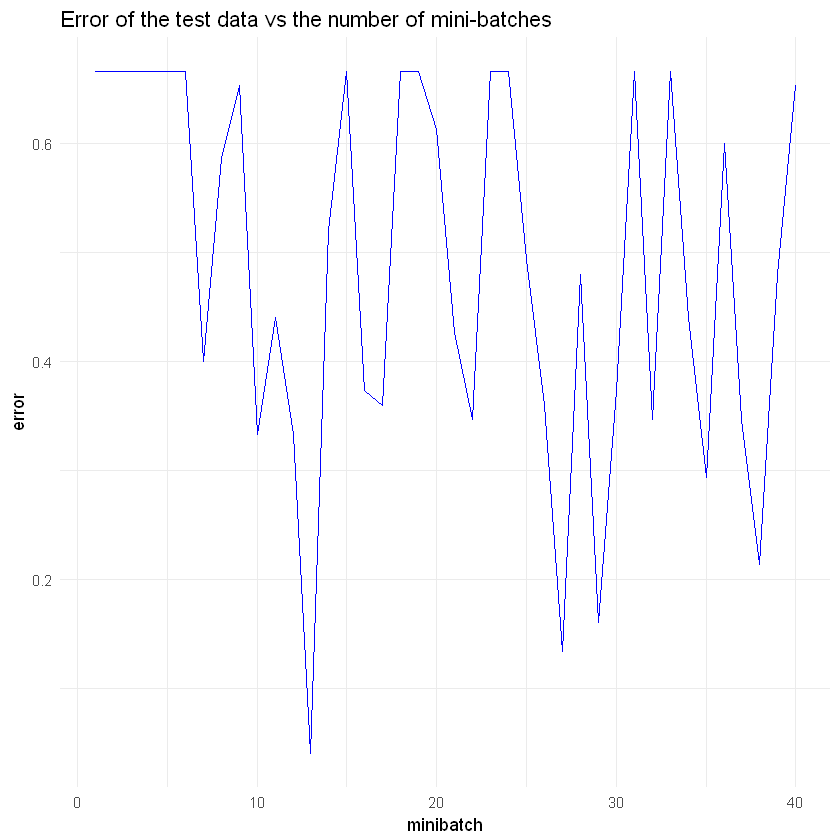

In [10]:
# Plot 
error.minibatch <- cbind(1:nrow(error.minibatch),error.minibatch)
error.minibatch <- as.data.frame(error.minibatch)
names(error.minibatch) <- c('minibatch','error')
ggplot(data=error.minibatch,aes(x=minibatch,y=error,))+geom_line(color='blue')+
  labs(title='Error of the test data vs the number of mini-batches') + theme_minimal()